In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.offline as plt
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib as mplt
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)



In [2]:
charactestics = pd.read_csv('caracteristics.csv', low_memory=False)
holidays = pd.read_csv('holidays.csv', low_memory=False)
places = pd.read_csv('places.csv', low_memory=False)
users = pd.read_csv('users.csv',low_memory=False)


In [3]:
rename_columns = {
    #characterstics
    'Num_Acc':'AccidentID',
    'an':'year',
    'mois':'month',
    'jour':'day',
    'hrmn':'hour',
    'lum':'lighting',
    'agg':'city/countryside',
    'int':'intersection',
    'atm':'atmosphericCondition',
    'col':'collisionType',
    'com':'municipality',
    'adr':'address',
    'gps':'gps_coding',
    'lat':'latitude',
    'long':'longitude',
    'dep':'department',
    #places
    'catr':'roadCategory',
    'voie':'roadNumber',
    'v1':'routeNumber',
    'v2':'routeName',
    'circ':'trafficType',
    'nbv':'numberofLanes',
    'pr':'homePRNumber',
    'pr1':'PRDistance',
    'vosp':'reservedLane',
    'prof':'roadProfile',
    'plan':'laneStructure',
    'lartpc':'centralLaneWidth',
    'larrout':'outerLaneWidth',
    'surf':'surfaceCondition',
    'infra':'infrastructure',
    'situ':'situationofAccident',
    'env1':'schoolPoint',
    #users
    'Acc_number':'AccidentID',
    'place':'place',
    'catu':'userCategory',
    'grav':'severity',
    'sexe' : 'sex',
    'trajet':'reasonForTraveling',
    'secu':'safetyEquipment',
    'locp':'locationOfPedestrian',
    'actp':'actionOfPedestrian',
    'etatp':'pedestrianGroup',
    'an_nais':'yearOfBirth',
    'num_veh':'registrationOfVehicle',
}

charactestics.rename(index=str, columns= rename_columns, inplace=True)
holidays.rename(index=str, columns=rename_columns, inplace=True)
places.rename(index=str, columns=rename_columns, inplace=True)
users.rename(index=str, columns=rename_columns, inplace=True)

In [4]:
charactestics.head(5)

,AccidentID,year,month,day,hour,lighting,city/countryside,intersection,atmosphericCondition,collisionType,municipality,address,gps_coding,latitude,longitude,department
0,201600000001,16,2,1,1445,1,2,1,8.0,3.0,5.0,"46, rue Sonneville",M,0.0,0,590
1,201600000002,16,3,16,1800,1,2,6,1.0,6.0,5.0,1a rue du cimeti�re,M,0.0,0,590
2,201600000003,16,7,13,1900,1,1,1,1.0,6.0,11.0,NaN,M,0.0,0,590
3,201600000004,16,8,15,1930,2,2,1,7.0,3.0,477.0,52 rue victor hugo,M,0.0,0,590
4,201600000005,16,12,23,1100,1,2,3,1.0,3.0,11.0,rue Joliot curie,M,0.0,0,590


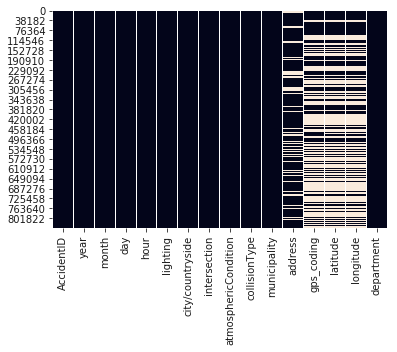

In [5]:
#missing values
sns.heatmap(charactestics.isnull(), cbar=False)
sns.set(rc={'figure.figsize':(14,10)})


In [6]:
#percentage table of missing values
missingData = charactestics.isnull().sum() / len(charactestics)
df = pd.DataFrame({'percentage': missingData})
df = df.sort_values('percentage',ascending=False)
df

,percentage
longitude,0.568484
latitude,0.568479
gps_coding,0.564009
address,0.167315
atmosphericCondition,0.000065
collisionType,0.000013
municipality,0.000002
AccidentID,0.000000
year,0.000000
month,0.000000


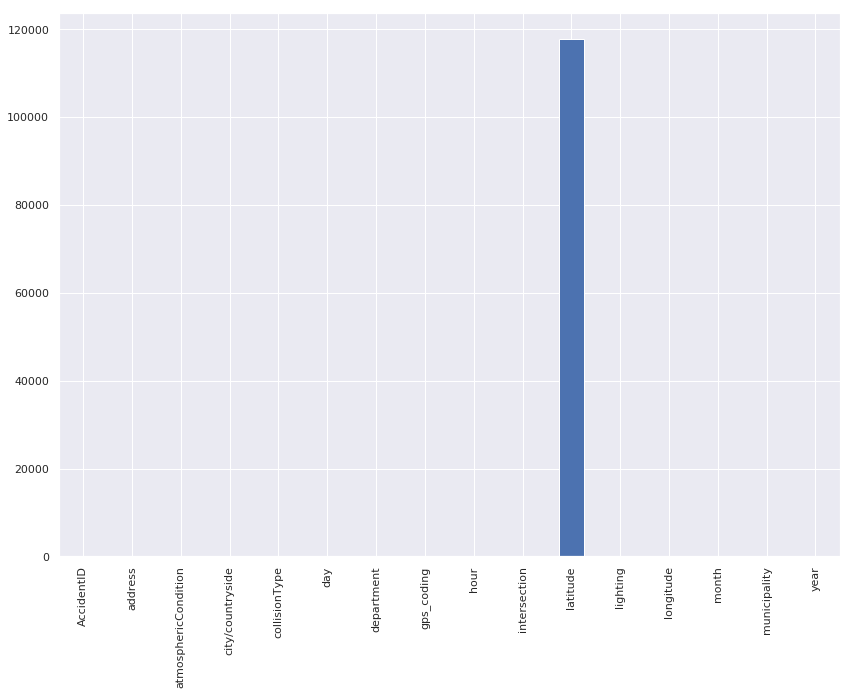

In [7]:
#sum of 0 values  
tmp = len(charactestics)-charactestics.astype(bool).sum(axis=0) 
#count: charactestics.loc[charactestics["latitude"] == 0].count() #117839
#0 median goes through France
tmp.sort_index().plot.bar()

In [8]:
#table of 0 values
print tmp

AccidentID                   0
year                         0
month                        0
day                          0
hour                         0
lighting                     0
city/countryside             0
intersection               106
atmosphericCondition         0
collisionType                0
municipality                 1
address                      0
gps_coding                   0
latitude                117839
longitude                    0
department                   0
dtype: int64


In [9]:
missingData = holidays.isnull().sum() / len(holidays)
df = pd.DataFrame({'percentage': missingData})
df = df.sort_values('percentage',ascending=False)
df
#no missing values in hlidays

,percentage
ds,0.0
holiday,0.0


In [10]:
#missing data in places
import plotly.graph_objs as go

missingData = places.isnull().sum() / len(places)
missingData = missingData[missingData > 0.05]
missingData = missingData.to_frame()
missingData.columns = ['missing']
missingData.index.names = ['name']
missingData['name'] = missingData.index
data = [go.Bar(x=missingData['name'], y=missingData['missing'])]
layout = go.Layout( title='Undefined values in places')
fig = go.Figure(data=data, layout=layout)
plt.iplot(fig)

In [11]:
missingData = places.isnull().sum() / len(places)
df = pd.DataFrame({'percentage': missingData})
df = df.sort_values('percentage',ascending=False)
df

,percentage
routeName,0.959579
routeNumber,0.603783
PRDistance,0.507773
homePRNumber,0.506217
roadNumber,0.070324
centralLaneWidth,0.011363
outerLaneWidth,0.009856
numberofLanes,0.002131
reservedLane,0.001952
infrastructure,0.001521


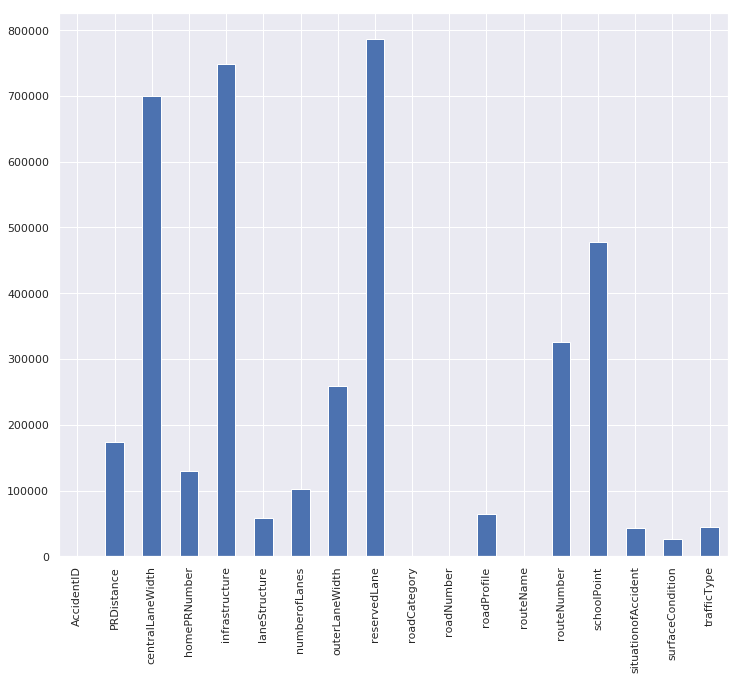

In [12]:
#0 values 
tmp = len(places) - places.astype(bool).sum(axis=0) 
tmp.sort_index().plot.bar(figsize=(12,10))

In [13]:
print tmp.sort_values(ascending=False)

reservedLane           787021
infrastructure         747965
centralLaneWidth       699686
schoolPoint            477933
routeNumber            325698
outerLaneWidth         258253
PRDistance             173181
homePRNumber           129543
numberofLanes          102796
roadProfile             63894
laneStructure           57847
trafficType             44556
situationofAccident     43291
surfaceCondition        26998
routeName                   0
roadNumber                  0
roadCategory                0
AccidentID                  0
dtype: int64


In [14]:
#users missing data
missingData = users.isnull().sum() / len(users)
df = pd.DataFrame({'percentage': missingData})
df = df.sort_values('percentage',ascending=False)
df


,percentage
place,0.053500
safetyEquipment,0.023165
yearOfBirth,0.001253
actionOfPedestrian,0.000945
pedestrianGroup,0.000909
locationOfPedestrian,0.000887
reasonForTraveling,0.000197
AccidentID,0.000000
userCategory,0.000000
severity,0.000000


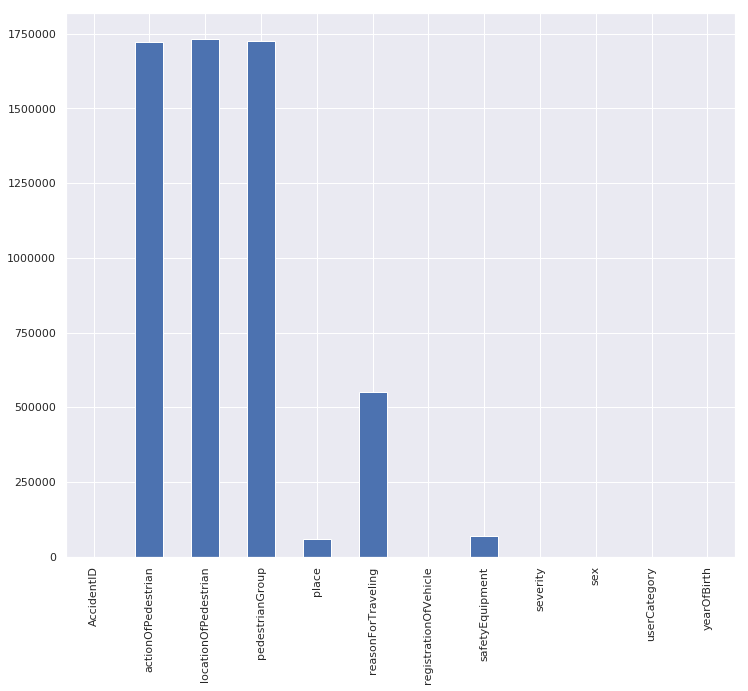

In [15]:
#0 values in users
tmp = len(users) - users.astype(bool).sum(axis=0) 
tmp.sort_index().plot.bar(figsize=(12,10))

In [16]:
print tmp.sort_values(ascending=False)

locationOfPedestrian     1732439
pedestrianGroup          1725093
actionOfPedestrian       1723439
reasonForTraveling        550516
safetyEquipment            68374
place                      60766
registrationOfVehicle          0
yearOfBirth                    0
sex                            0
severity                       0
userCategory                   0
AccidentID                     0
dtype: int64
